# Esercitazione 4  
## Discrete Fourier Transform

### Sommario  

In questa esercitazione, esploreremo la Trasformata di Fourier Discreta (DFT) e la sua implementazione numerica. In particolare, gli esercizi sono volti a comprendere concetti fondamentali dell’analisi spettrale e il loro utilizzo pratico.

Calcoleremo manualmente la DFT di vettori di diversa lunghezza e verificheremo i risultati utilizzando la funzione `fft` della libreria `scipy`. Successivamente, implementeremo funzioni personalizzate per il calcolo della DFT e della sua inversa, confrontandole con le funzioni di libreria. Analizzeremo inoltre le proprietà della DFT applicandola a segnali noti e verificando gli effetti nel dominio della frequenza. Infine, studieremo le caratteristiche spettrali di segnali specifici attraverso la loro DFT e rappresenteremo graficamente il modulo della trasformata.

In [2]:
import numpy as np
import matplotlib.pylab as plt
import scipy.fft as fft

#### Esercizio 1  

Calcolare attraverso la definizione la DFT dei seguenti vettori:
- `v1 = [2, 3]`
- `v2 = [2, 4, 5]`
- `v3 = [3, 4, 5, 6]`

Verificare con Python la correttezza utilizzando `scipy.fft.fft`.

In [6]:
# Vettori di esempio
x1 = np.array([2, 3])
x2 = np.array([2, 4, 5])
x3 = np.array([3, 4, 5, 6])

# Lista di vettori da testare
vettori = [(x1, "v1 = [2, 3]"), (x2, "v2 = [2, 4, 5]"), (x3, "v3 = [3, 4, 5, 6]")]

for x, label in vettori:
    print(f"\n🔹 Test su {label}")

    # Calcolo DFT con scipy
    X_lib = fft.fft(x)

    # Calcolo DFT con funzione definita
    X_custom = dft(x)

    # Calcolo IDFT per verifica ricostruzione
    x_rec = idft(X_custom)

    # Confronto tra trasformate
    dft_diff = np.max(np.abs(X_custom - X_lib))
    print(f"  ✅ Errore max tra DFT custom e scipy: {dft_diff:.2e}")

    # Confronto tra segnale originale e ricostruito
    rec_diff = np.max(np.abs(x_rec - x))
    print(f"  🔁 Errore max ricostruzione IDFT: {rec_diff:.2e}")



🔹 Test su v1 = [2, 3]
  ✅ Errore max tra DFT custom e scipy: 3.67e-16
  🔁 Errore max ricostruzione IDFT: 1.84e-16

🔹 Test su v2 = [2, 4, 5]
  ✅ Errore max tra DFT custom e scipy: 3.64e-15
  🔁 Errore max ricostruzione IDFT: 1.18e-15

🔹 Test su v3 = [3, 4, 5, 6]
  ✅ Errore max tra DFT custom e scipy: 3.02e-15
  🔁 Errore max ricostruzione IDFT: 1.14e-15


#### Esercizio 2  

Scrivere una funzione che calcoli la DFT di un vettore.  
Verificare la correttezza della funzione confrontando con `scipy.fft.fft`.

In [4]:
### ------------------------------------------
### Esercizio 2 - Funzione per calcolare la DFT
### ------------------------------------------

def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

#### Esercizio 3  

Scrivere una funzione che calcoli la DFT inversa di un vettore di coefficienti.  
Verificare la correttezza confrontando con `scipy.fft.ifft`.

In [5]:
### -----------------------------------------------
### Esercizio 3 - Funzione per calcolare la IDFT
### -----------------------------------------------

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

#### Esercizio 4  

Sia `X = [0, 1, 2, 3, 4]` la DFT di un certo vettore `x`.  
Quale sarà la DFT del vettore `y(n) = e^{i4\pi n/5} x(n)`?  
Rispondere prima utilizzando le proprietà della DFT e poi verificare con il codice sviluppato.

DFT originale X: [0.+0.j 1.+0.j 2.+0.j 3.+0.j 4.+0.j]
DFT del segnale modulato Y: [3.-0.j 4.-0.j 0.+0.j 1.+0.j 2.+0.j]


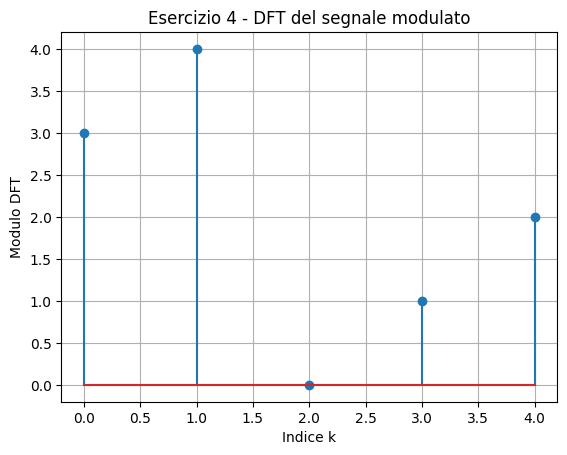

In [7]:
### ------------------------------------------
### Esercizio 4 - Effetto della modulazione complessa
### ------------------------------------------

# Supponiamo che X sia la DFT di un segnale x
X = np.array([0, 1, 2, 3, 4], dtype=complex)

# Ricostruiamo x tramite IDFT
x = idft(X)

# Definizione della modulazione: y(n) = exp(i * 4π * n / 5) * x(n)
N = len(x)
y = np.zeros(N, dtype=complex)
for n in range(N):
    y[n] = np.exp(1j * 4 * np.pi * n / N) * x[n]

# Calcoliamo la DFT del segnale modulato y
Y = dft(y)

# Risultato atteso teorico:
# DFT{ e^{i2πkn/N} * x(n) } = shift ciclico della DFT originale
# Qui: moltiplicare per e^{i4πn/5} ⇒ shift di 2 posizioni (per N = 5)

print("DFT originale X:", X)
print("DFT del segnale modulato Y:", np.round(Y, 2))

# Plot del modulo della DFT
plt.stem(np.abs(Y))
plt.ylabel('Modulo DFT')
plt.xlabel('Indice k')
plt.title('Esercizio 4 - DFT del segnale modulato')
plt.grid(True)
plt.show()


#### Esercizio 5  

Considerare i segnali:
- `2018 * sin(2 k π t)`, k = 1, 2, 3;
- `cos(2 k π t)`, k = 1, 2, 3;
- `cos(2 π t) + cos(6 π t) + cos(10 π t)`;
- `e^{2 π i t}`;

dove `t` è un vettore equispaziato di 50 punti in `[0, 1]`.  
Calcolare la DFT usando la funzione creata e fare un grafico del **modulo** della trasformata.  
Spiegare i risultati alla luce delle proprietà della DFT.

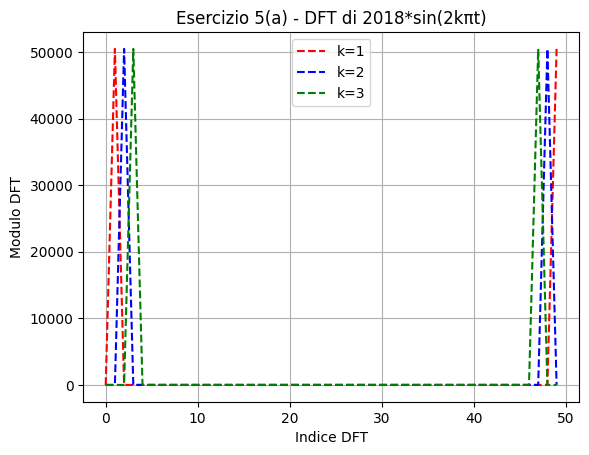

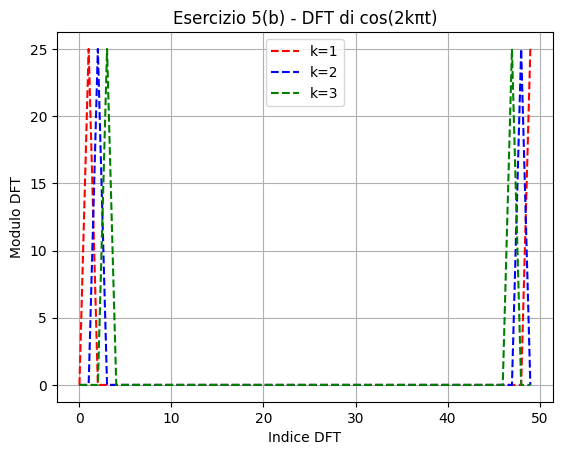

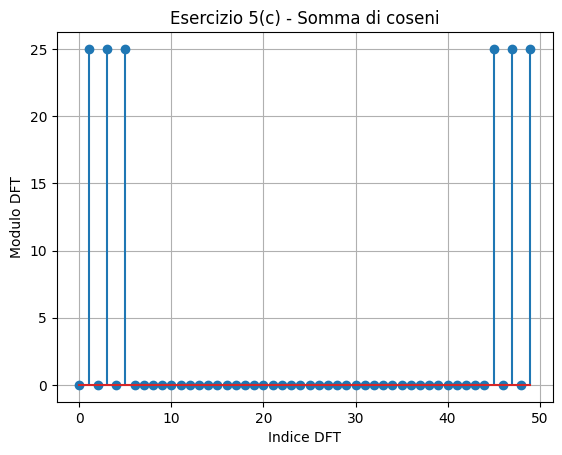

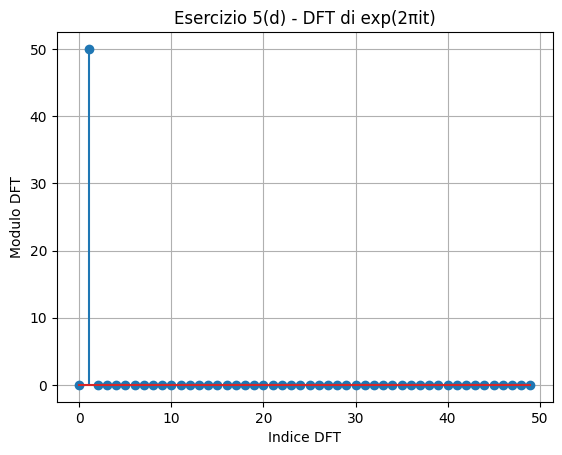

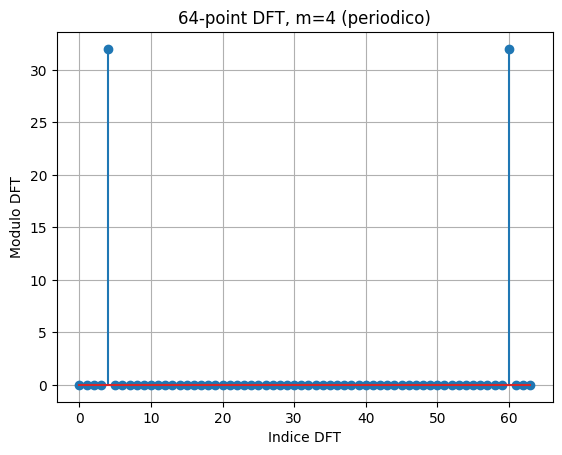

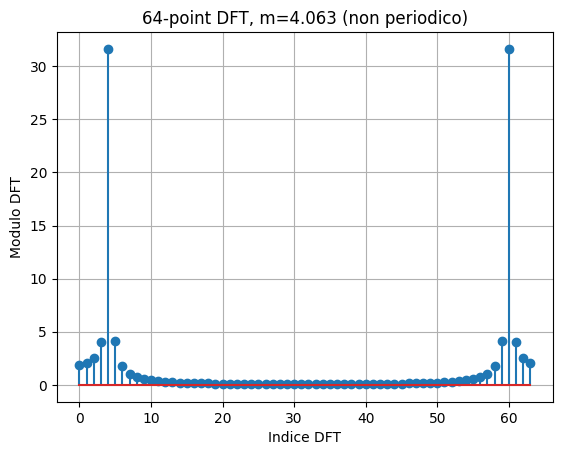

In [8]:
# ---------------------------------------
# Esercizio 5 - Analisi spettrale segnali
# ---------------------------------------

# Vettore temporale equispaziato
t = np.arange(50) / 50
N = len(t)

### --------------------------
### (a) Segnali sinusoidali
### --------------------------

a1 = 2018 * np.sin(2 * np.pi * t)
a2 = 2018 * np.sin(2 * np.pi * 2 * t)
a3 = 2018 * np.sin(2 * np.pi * 3 * t)

A1 = np.abs(dft(a1))
A2 = np.abs(dft(a2))
A3 = np.abs(dft(a3))

plt.figure()
plt.plot(np.arange(N), A1, 'r--', label='k=1')
plt.plot(np.arange(N), A2, 'b--', label='k=2')
plt.plot(np.arange(N), A3, 'g--', label='k=3')
plt.title("Esercizio 5(a) - DFT di 2018*sin(2kπt)")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo DFT")
plt.legend()
plt.grid(True)
plt.show()

### --------------------------
### (b) Coseni a frequenze diverse
### --------------------------

b1 = np.cos(2 * np.pi * t)
b2 = np.cos(2 * np.pi * 2 * t)
b3 = np.cos(2 * np.pi * 3 * t)

B1 = np.abs(dft(b1))
B2 = np.abs(dft(b2))
B3 = np.abs(dft(b3))

plt.figure()
plt.plot(np.arange(N), B1, 'r--', label='k=1')
plt.plot(np.arange(N), B2, 'b--', label='k=2')
plt.plot(np.arange(N), B3, 'g--', label='k=3')
plt.title("Esercizio 5(b) - DFT di cos(2kπt)")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo DFT")
plt.legend()
plt.grid(True)
plt.show()

### --------------------------
### (c) Somma di coseni
### --------------------------

c = np.cos(2*np.pi*t) + np.cos(6*np.pi*t) + np.cos(10*np.pi*t)
C = np.abs(dft(c))

plt.figure()
plt.stem(C)
plt.title("Esercizio 5(c) - Somma di coseni")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo DFT")
plt.grid(True)
plt.show()

### --------------------------
### (d) Esponenziale complessa
### --------------------------

d = np.exp(2j * np.pi * t)
D = np.abs(dft(d))

plt.figure()
plt.stem(D)
plt.title("Esercizio 5(d) - DFT di exp(2πit)")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo DFT")
plt.grid(True)
plt.show()

### --------------------------
### (Extra) Spectral leakage
### --------------------------

tt = np.arange(64) / 64
bb = np.cos(2 * np.pi * 4 * tt)
BB = np.abs(dft(bb))

s = np.linspace(0, 1, 64)
bs = np.cos(2 * np.pi * 4.063 * s)
Bs = np.abs(dft(bs))

# Segnale perfettamente periodico (frequenza intera)
plt.figure()
plt.stem(BB)
plt.title("64-point DFT, m=4 (periodico)")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo DFT")
plt.grid(True)
plt.show()

# Segnale non perfettamente periodico (spettro disperso)
plt.figure()
plt.stem(Bs)
plt.title("64-point DFT, m=4.063 (non periodico)")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo DFT")
plt.grid(True)
plt.show()


#### Esercizio 6  

Considerare i segnali di lunghezza 50:
- `[0, 10, 0, 0, ..., 0]`
- `[0, 10, 0, 0, ..., 0, 10]`

Calcolare la DFT usando la funzione creata e fare un grafico del **modulo**.  
Spiegare i risultati alla luce delle proprietà della DFT.

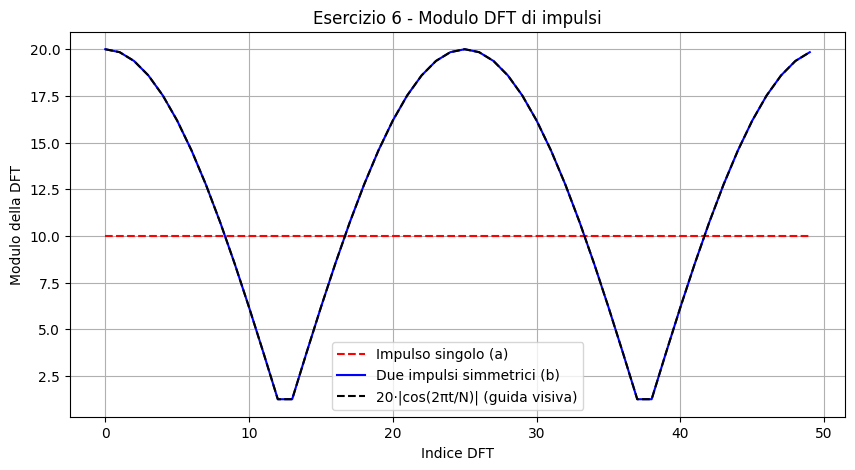

In [9]:
# ---------------------------------------
# Esercizio 6 - DFT di impulsi localizzati
# ---------------------------------------

# Lunghezza dei segnali
N = 50
t = np.arange(N)

# Segnale a: impulso singolo
a = np.zeros(N)
a[1] = 10  # impulso in posizione 1

# Segnale b: due impulsi simmetrici
b = np.zeros(N)
b[1] = 10
b[-1] = 10  # impulso in posizione N-1 (equivalente a -1 per periodicità)

# Calcolo della DFT (modulo)
A = np.abs(dft(a))
B = np.abs(dft(b))

# ----------------------
# Plot del modulo della DFT
# ----------------------
plt.figure(figsize=(10, 5))
plt.plot(t, A, 'r--', label="Impulso singolo (a)")
plt.plot(t, B, 'b-', label="Due impulsi simmetrici (b)")
plt.plot(t, 20 * np.abs(np.cos(2 * np.pi * t / N)), 'k--', label="20·|cos(2πt/N)| (guida visiva)")

plt.title("Esercizio 6 - Modulo DFT di impulsi")
plt.xlabel("Indice DFT")
plt.ylabel("Modulo della DFT")
plt.legend()
plt.grid(True)
plt.show()
